# IUI Tutorial 8: Human-robot interaction -- pose detection


> MMPose Repository: https://github.com/open-mmlab/mmpose/tree/main \
> Link for installation: https://mmpose.readthedocs.io/en/latest/installation.html \
> Pytorch website: https://pytorch.org/

## Install MMPose

### Google Colab

Google Colab usually has PyTorch installed, but it may not be compatible with MMCV, thus we need to install from scratch.

In [ ]:
!pip install torch==2.0.0 torchvision==0.15.0 torchaudio==2.0.0 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 652.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89991 sha256=dc2fa0662aa5e195391dfb1510f9694ee8d493021086b5c94ac5c6675841d63d
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b44fe0dea1bb35234b09f2c22fb8ebb308679c922
Successfully built lit
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchvision
    Found existing in

In [ ]:
import torch
print(torch.__version__)

2.0.0+cu118


step 1: Install MMCV

In [ ]:
!pip install "mmcv==2.1.0" -f https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.7/452.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 22.0 MB/s eta 0:00:00


step 2: Install MMPose

In [ ]:
!git clone https://github.com/open-mmlab/mmpose.git
%cd mmpose
!pip install -e .

Cloning into 'mmpose'...
remote: Enumerating objects: 31261, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 31261 (delta 10), reused 2 (delta 2), pack-reused 31236 (from 2)
Receiving objects: 100% (31261/31261), 53.43 MiB | 17.75 MiB/s, done.
Resolving deltas: 100% (22020/22020), done.
/content/mmpose
Obtaining file:///content/mmpose
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/jin-s13/xtcocoapi to /tmp/pip-install-46fgg064/xtcocotools_38bab2863e5945eb8363da5579a180a2
  Running command git clone --filter=blob:none --quiet https://github.com/jin-s13/xtcocoapi /tmp/pip-install-46fgg064/xtcocotools_38bab2863e5945eb8363da5579a180a2
  Resolved https://github.com/jin-s13/xtcocoapi to commit d74033ff1635e9002133b2380862bc2b728584d2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created 

> Note that within Jupyter, the exclamation mark ! is used to call external executables and %cd is a magic command to change the current working directory of Python

step 3: Verification

In [ ]:
import mmpose
print(mmpose.__version__)

1.3.2


step 4: Install some other useful toolkit

In [ ]:
!pip install mmdet seaborn tqdm imageio-ffmpeg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.9 MB/s eta 0:00:00



## 2D Human Keypoint Detection using a Pre-trained Mode

In [ ]:
# just for check working directory
# import os
# print(os.listdir(os.getcwd()))

# os.chdir('mmpose')
# os.listdir()

import necessary toolkits

In [ ]:
import cv2
from mmpose.apis import inference_topdown
from mmpose.apis import init_model as init_pose_estimator # for pose estimation
from mmdet.apis import inference_detector, init_detector # for object detection
from mmpose.registry import VISUALIZERS # for visualization of the results
from mmengine.registry import init_default_scope
import numpy as np
from mmpose.evaluation.functional import nms  # for post-processing of the results from object detection model

# Import visualization toolkit matplotlib, and make plot insert in this notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Define a function to visualize an image given its file path
def show_img_from_path(img_path):
    '''Read the image using OpenCV (BGR format) and convert it to RGB for Matplotlib visualization'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/usr/local/lib/python3.1

Specify the model's configuration file (`config`) and checkpoint file (`weights`)

In [ ]:
# object detection model
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# pose estimation model
pose_config = 'configs/body_2d_keypoint/topdown_heatmap/coco/td-hm_hrnet-w32_8xb64-210e_coco-256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth'


Initialize the model

In [ ]:
device = 'cuda:0'
# device = 'cpu'

# object detection model
det_model = init_detector(det_config, det_checkpoint, device=device)

# pose estimation model
cfg_options = dict(model=dict(test_cfg=dict(output_heatmaps=True))) # modify config to let model output heatmaps
pose_model = init_pose_estimator(pose_config, pose_checkpoint, device=device,
    cfg_options=cfg_options)

# init visualizer
pose_model.cfg.visualizer.radius = 3
pose_model.cfg.visualizer.line_width = 1
visualizer = VISUALIZERS.build(pose_model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_pose_estimator
# we pass this dataset_meta info to visualizer so that visualizer can correctly process data information
visualizer.set_dataset_meta(pose_model.dataset_meta)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Downloading: "https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth" to /root/.cache/torch/hub/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w32_coco_256x192-c78dce93_20200708.pth


Load image as input and display it

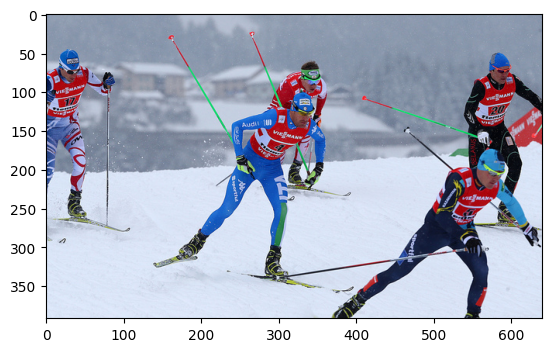

In [ ]:
img_path = 'tests/data/coco/000000197388.jpg'
show_img_from_path(img_path)

run object detection

>The results include bounding box predictions for 80 categories from the MS COCO dataset. Each bounding box contains the following information:\
Top-left X coordinate, Top-left Y coordinate, Bottom-right X coordinate, Bottom-right Y coordinate, Confidence score

In [ ]:
scope = det_model.cfg.get('default_scope', 'mmdet')
if scope is not None:
    init_default_scope(scope)
detect_result = inference_detector(det_model, img_path)
pred_instance = detect_result.pred_instances.cpu().numpy()
print(pred_instance) # 0: person 30: skis 31: snowboard 35: baseball glove
bboxes = np.concatenate((pred_instance.bboxes, pred_instance.scores[:, None]), axis=1)
bboxes = bboxes[np.logical_and(pred_instance.labels == 0, pred_instance.scores > 0.3)] # only keep bboxes of person and confidence score > 0.3
print(f"bboxes before nms: {bboxes}")
bboxes = bboxes[nms(bboxes, 0.3)][:, :4] # if overlap > 0.3, we only keep the bbox with highest score
print(f"bboxes after nms: {bboxes}")

<InstanceData(

    META INFORMATION

    DATA FIELDS
    scores: array([0.9992305 , 0.9990595 , 0.9953809 , 0.978289  , 0.91705054,
               0.91392136, 0.90635407, 0.8887074 , 0.767817  , 0.57526463,
               0.5718574 , 0.5282598 , 0.49835053, 0.32154155, 0.24188216,
               0.20653296, 0.18609066, 0.16327444, 0.15876451, 0.13392949,
               0.1300064 , 0.12127015, 0.1182565 , 0.11348233, 0.11001828,
               0.10080278, 0.09898171, 0.09686402, 0.09466592, 0.08916242,
               0.0800698 , 0.06079422, 0.05768932], dtype=float32)
    labels: array([ 0,  0,  0,  0,  0, 30, 30, 30, 30, 30,  0,  0, 30,  0, 30, 30, 30,
               30,  0, 30, 30, 30,  0,  0, 30, 30, 30, 35, 31, 30, 30, 30, 30])
    bboxes: array([[  0.       ,  41.838028 ,  87.01315  , 270.15155  ],
               [161.40646  ,  89.95487  , 368.12796  , 335.16107  ],
               [535.9794   ,  49.71637  , 640.       , 263.96985  ],
               [374.15012  , 182.63992  , 633.4

Run the `top-down` human pose estimation algorithm

In [ ]:
# predict keypoints
from mmpose.structures import merge_data_samples
pose_results = inference_topdown(pose_model, img_path, bboxes)
data_samples = merge_data_samples(pose_results)

01/15 10:26:31 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".


Visualize the results of human pose estimation

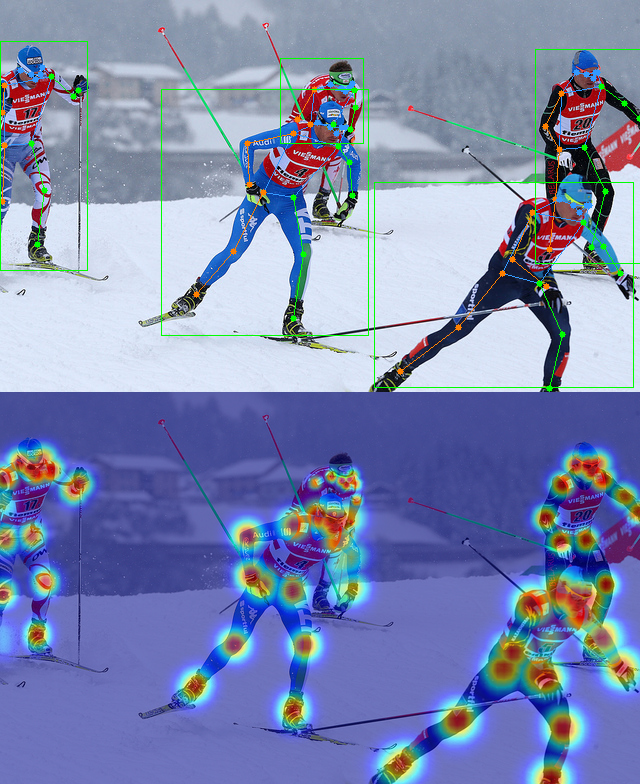

In [ ]:
# show the results
import mmcv
from mmcv import imread
from google.colab.patches import cv2_imshow
img = mmcv.imread(img_path, channel_order='rgb')

visualizer.add_datasample(
    'result', # Title of the visualized image
    img,
    data_sample=data_samples,
    draw_gt=False,
    draw_heatmap=True,
    draw_bbox=True,
    show=False, # Whether to display the image on the screen
    wait_time=0, # Time (in seconds) to wait when displaying the image (only works if show=True)
    out_file=None, # File path to save the visualized image
    kpt_thr=0.3) # Threshold for keypoint confidence; only keypoints above this value will be visualized

vis_result = visualizer.get_image()
cv2_imshow(vis_result[:,:,::-1])